In [1]:
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [3]:
#변환
train['datetime'] = pd.to_datetime(train['datetime']) 
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year 
train['month'] = train['datetime'].dt.month 
train['day'] = train['datetime'].dt.day 
train['hour'] = train['datetime'].dt.hour 

test['year'] = test['datetime'].dt.year 
test['month'] = test['datetime'].dt.month 
test['day'] = test['datetime'].dt.day 
test['hour'] = test['datetime'].dt.hour 

In [4]:
#데이터 전처리
drop_cols = ['datetime','casual','registered']
train.drop(drop_cols,axis=1,inplace=True)
test.drop(['datetime'],axis=1,inplace=True)

X=train.drop(['count'],axis=1,inplace=False)
y= train['count']

In [5]:
X_ohe = pd.get_dummies(X, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])
X_test_ohe =  pd.get_dummies(test, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [139]:
print(X_ohe.shape, "\n", X_test_ohe.shape)

(10886, 55) 
 (6493, 55)


In [7]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [8]:
X_ohe.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


<AxesSubplot:xlabel='weather', ylabel='count'>

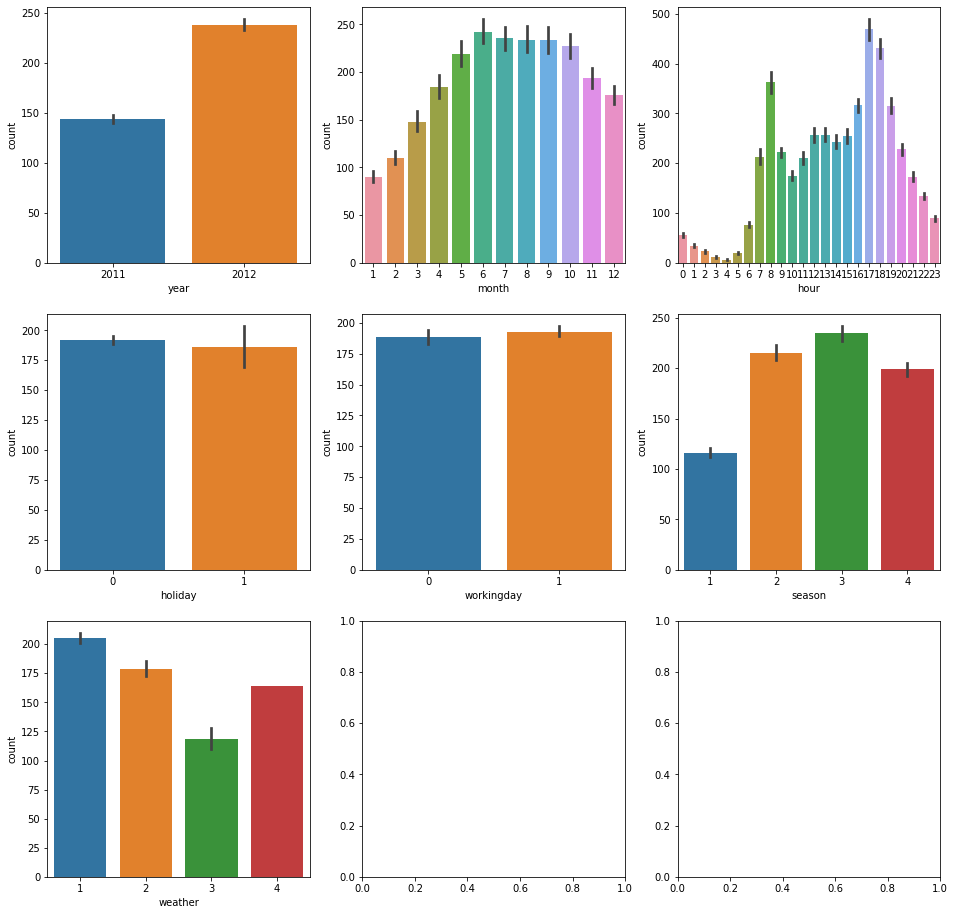

In [9]:
#데이터 시각화
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,16), ncols=3, nrows=3)

sns.barplot(x='year', y='count', data=train, ax=ax[0,0])
sns.barplot(x='month', y='count', data=train, ax=ax[0,1])
sns.barplot(x='hour', y='count', data=train, ax=ax[0,2])
sns.barplot(x='holiday', y='count', data=train, ax=ax[1,0])
sns.barplot(x='workingday', y='count', data=train, ax=ax[1,1])
sns.barplot(x='season', y='count', data=train, ax=ax[1,2])
sns.barplot(x='weather', y='count', data=train, ax=ax[2,0])

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 42)

In [124]:
print(X_train.shape,"\n",X_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(8708, 55) 
 (2178, 55) 
 (8708,) 
 (2178,)


In [138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=28, max_features=50, min_samples_split=17, min_samples_leaf=4, random_state=42).fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(RMSE)

59.01095106637449
